### Keras and Tensorflow >2.0

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv(r'C:\Users\Yash Kumar\Downloads\Google_Stock_Price_Train (1).csv', parse_dates = True)

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


<AxesSubplot:>

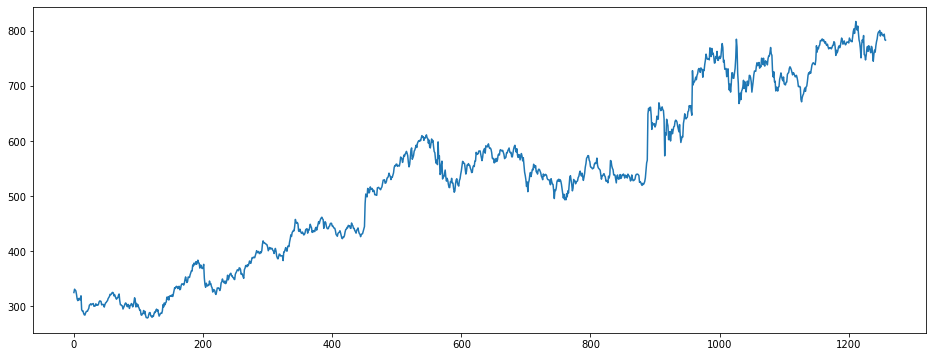

In [6]:
dataset['Open'].plot(figsize=(16,6))

### Convert column of a Dataframe

In [7]:
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [8]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### 7 day rolling mean

In [9]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,323.002857,325.392857,318.682857,643.132857
7,321.457143,322.882857,316.841429,638.037143
8,318.698571,319.801429,314.025714,631.870000
9,316.552857,317.524286,311.851429,627.534286


<AxesSubplot:>

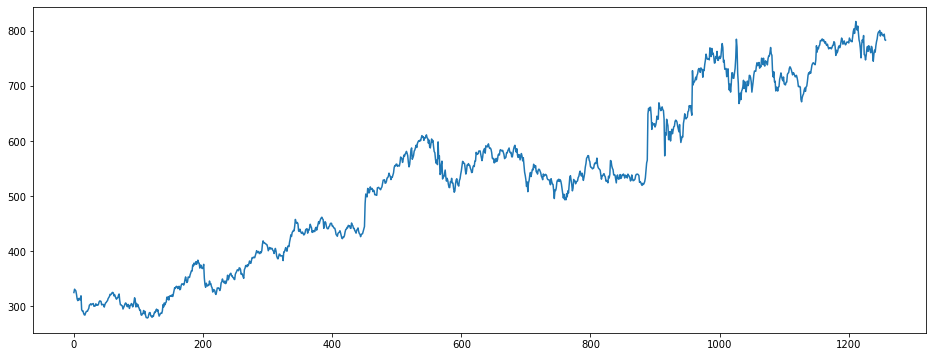

In [10]:
 dataset['Open'].plot(figsize=(16,6))

<AxesSubplot:>

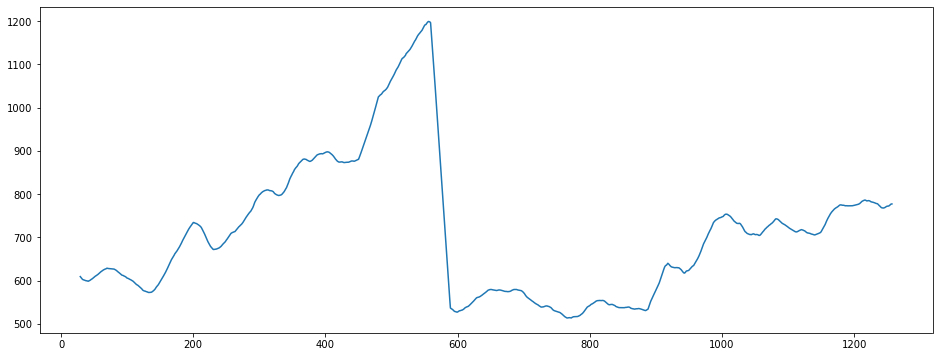

In [11]:
dataset.rolling(window=30).mean()['Close'].plot(figsize = (16,6))

<AxesSubplot:>

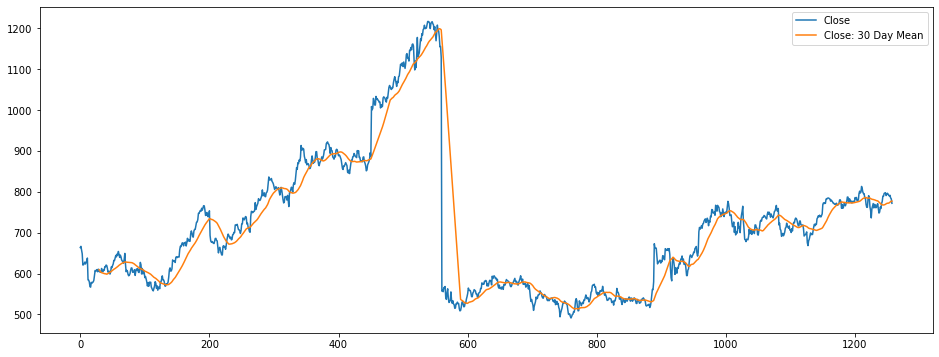

In [12]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window = 30).mean()
dataset[['Close', 'Close: 30 Day Mean']].plot(figsize = (16,6))

### Optional specify a minimum number periods

<AxesSubplot:>

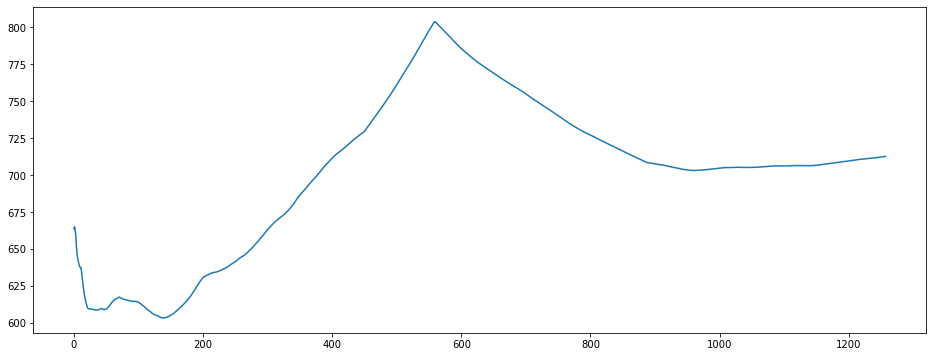

In [13]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [14]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [15]:
training_set.head(20)

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
5,313.70
6,310.59
7,314.43
8,311.96
9,314.81


### Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc = MinMaxScaler(feature_range = (0,1))

In [18]:
training_set_scaled = sc.fit_transform(training_set)

### Creating the data structure with 60 timesteps and 1 output

In [19]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Building the RNN

#### import the keras libraries and packages 

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yash Kumar\anaconda4\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yash Kumar\anacon

### Initialising the RNN

In [23]:
regressor = Sequential()

## Adding the first LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## Adding a second LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding a third LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding a fourth LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

## Adding the output layers

In [29]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [31]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0469
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0074
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0063
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0060
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0055
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - l

## Making the predictions and visualising the data

#### Getting the test data

In [32]:
dataset_test = pd.read_csv(r"C:\Users\Yash Kumar\Downloads\Google_Stock_Price_Test (1).csv")

In [69]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300.0
1,1/4/2017,788.36,791.34,783.16,786.90,1073000.0
2,1/5/2017,786.08,794.48,785.02,794.02,1335200.0
3,1/6/2017,795.26,807.90,792.20,806.15,1640200.0
4,1/9/2017,806.40,809.97,802.83,806.65,1272400.0


In [33]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [60]:

real_stock_price = pd.DataFrame(real_stock_price)
real_stock_price.head(10)

,0
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


<AxesSubplot:>

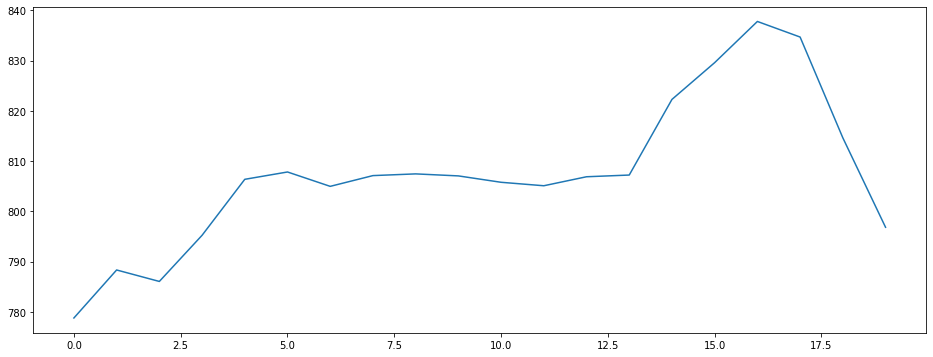

In [70]:
 dataset_test['Open'].plot(figsize=(16,6))

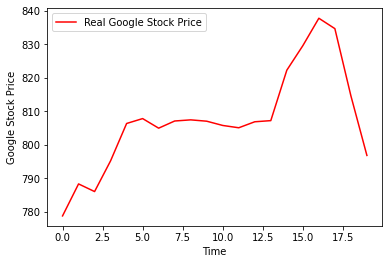

In [67]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [68]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300.0
1,1/4/2017,788.36,791.34,783.16,786.90,1073000.0
2,1/5/2017,786.08,794.48,785.02,794.02,1335200.0
3,1/6/2017,795.26,807.90,792.20,806.15,1640200.0
4,1/9/2017,806.40,809.97,802.83,806.65,1272400.0


In [37]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [40]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [41]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [42]:
test_set.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [43]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


### Getting the predicted stock price

In [44]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)

In [45]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [46]:
inputs = inputs.reshape(-1,1)

In [47]:
inputs = sc.transform(inputs)

In [48]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [49]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [50]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


### Visualising the result

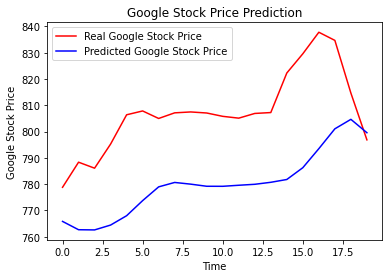

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()